In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

In [3]:
'''
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_project - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
'''

'\n1. satisfaction_level - Уровень удовлетворенности работой\n2. Last_evaluation - Время с момента последней оценки в годах\n3. number_project - Количество проектов, выполненных за время работы\n4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц\n5. time_spend_company - Стаж работы в компании в годах\n6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником\n7. left - уволился ли сотрудник\n8. promotion_last_5years - повышался ли сотрудник за последние пять лет\n9. department - отдел в котором работает сотрудник\n10. salary - относительный уровень зарплаты\n'

# Задание 1

In [4]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2

In [5]:
columns_=['satisfaction_level',
          'last_evaluation',
          'number_project',
          'average_montly_hours',
          'time_spend_company',
          'Work_accident',
          'left',
          'promotion_last_5years']

In [6]:
def basic_stat(data, col):
    for row in col:
        m = sum(data[row])/len(data[row])
        md = data[row].median()
        mode = data[row].mode()[0]
        min_ = data[row].min()
        max_ = data[row].max()
        std = data[row].std()
        print('--------')
        print('')
        print('Среднее в ', row, ': ', m)
        print('Медиана в ', row, ': ', md)
        print('Мода в ', row, ': ', mode)
        print('Минимум в ', row, ': ', min_)
        print('Максимум в ', row, ': ', max_)
        print('Ср. отклонение в ', row, ': ', std)
        print('')
    

In [7]:
basic_stat(df, columns_)

--------

Среднее в  satisfaction_level :  0.6128335222348166
Медиана в  satisfaction_level :  0.64
Мода в  satisfaction_level :  0.1
Минимум в  satisfaction_level :  0.09
Максимум в  satisfaction_level :  1.0
Ср. отклонение в  satisfaction_level :  0.2486306510611418

--------

Среднее в  last_evaluation :  0.7161017401159978
Медиана в  last_evaluation :  0.72
Мода в  last_evaluation :  0.55
Минимум в  last_evaluation :  0.36
Максимум в  last_evaluation :  1.0
Ср. отклонение в  last_evaluation :  0.17116911062327592

--------

Среднее в  number_project :  3.80305353690246
Медиана в  number_project :  4.0
Мода в  number_project :  4
Минимум в  number_project :  2
Максимум в  number_project :  7
Ср. отклонение в  number_project :  1.2325923553183857

--------

Среднее в  average_montly_hours :  201.0503366891126
Медиана в  average_montly_hours :  200.0
Мода в  average_montly_hours :  135
Минимум в  average_montly_hours :  96
Максимум в  average_montly_hours :  310
Ср. отклонение в  aver

In [8]:
# ну или так
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Задание 3

<Axes: >

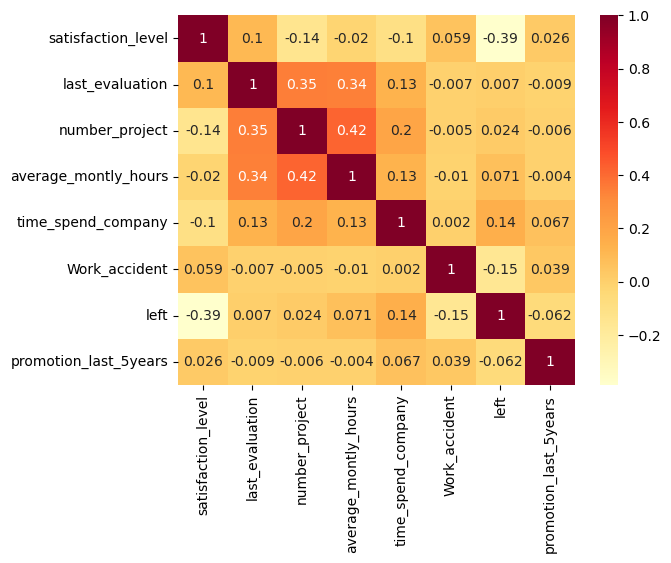

In [9]:
sns.heatmap(df[columns_].corr().round(3), cmap="YlOrRd", annot=True)

Две самые скорелированные переменные: это left и promotion_last_5years. То есть есть статистическая связь между уволившимися сотрудниками и сотрудниками которые получали повышение в последние 5 лет. Самый низкий уровень крреляции у переменных Work_accident и time_send_company. Статистическая связь между показателями по несчастным случаям и стажем работы отсутствует.

# Задание 4 

In [10]:
df.groupby('department')['department'].value_counts()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: count, dtype: int64

Больше все в департаменте sales

# Задание 5

In [11]:
df.groupby('salary')['salary'].value_counts()

salary
high      1237
low       7316
medium    6446
Name: count, dtype: int64

# Задание 6

In [12]:
df.groupby(['department', 'salary'])['salary'].value_counts()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: count, dtype: int64

# Задание 7

In [13]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
df_sal_low = df[df['salary'] == 'low']
df_sal_medium = df[df['salary'] == 'medium']
df_sal_high = df[df['salary'] == 'high']

In [15]:
basic_stat(df_sal_low, ['average_montly_hours'])

--------

Среднее в  average_montly_hours :  200.9965828321487
Медиана в  average_montly_hours :  199.0
Мода в  average_montly_hours :  135
Минимум в  average_montly_hours :  96
Максимум в  average_montly_hours :  310
Ср. отклонение в  average_montly_hours :  50.832214201477065



In [16]:
basic_stat(df_sal_medium, ['average_montly_hours'])

--------

Среднее в  average_montly_hours :  201.33834936394663
Медиана в  average_montly_hours :  201.0
Мода в  average_montly_hours :  156
Минимум в  average_montly_hours :  96
Максимум в  average_montly_hours :  310
Ср. отклонение в  average_montly_hours :  49.34418794966946



In [17]:
basic_stat(df_sal_high, ['average_montly_hours'])

--------

Среднее в  average_montly_hours :  199.86742118027485
Медиана в  average_montly_hours :  199.0
Мода в  average_montly_hours :  180
Минимум в  average_montly_hours :  96
Максимум в  average_montly_hours :  307
Ср. отклонение в  average_montly_hours :  47.710445562322235



In [18]:
#Базовые статистики схожи, за исключением моды, попробуем сделать статистический анализ

In [19]:
def check_normality(data):
    stat, p = shapiro(data)
    print(f'Статистика = {stat:.5f}, p = {p:.5f}')
    if p < 0.05:
        print('Отклоняем нулевую гипотезу, данные распределены НЕ НОРМАЛЬНО')
    else:
        print('Принимаем нулевую гипотезу, данные распределены НОРМАЛЬНО')

In [20]:
check_normality(df_sal_low['average_montly_hours'])

Статистика = 0.95986, p = 0.00000
Отклоняем нулевую гипотезу, данные распределены НЕ НОРМАЛЬНО


C:\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
check_normality(df_sal_medium['average_montly_hours'])

Статистика = 0.96417, p = 0.00000
Отклоняем нулевую гипотезу, данные распределены НЕ НОРМАЛЬНО


In [22]:
check_normality(df_sal_high['average_montly_hours'])

Статистика = 0.97121, p = 0.00000
Отклоняем нулевую гипотезу, данные распределены НЕ НОРМАЛЬНО


In [23]:
def test_mannwh(data_1, data_2):
    stat, p = mannwhitneyu(data_1, data_2)
    print(f"Статистика = {stat:.5f}, p = {p:.5f}")
    if p > 0.05:
        print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
    else:
        print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

In [24]:
test_mannwh(df_sal_low['average_montly_hours'], df_sal_medium['average_montly_hours'])

Статистика = 23437165.50000, p = 0.54061
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [25]:
test_mannwh(df_sal_low['average_montly_hours'], df_sal_high['average_montly_hours'])

Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [26]:
test_mannwh(df_sal_medium['average_montly_hours'], df_sal_high['average_montly_hours'])

Статистика = 4030998.50000, p = 0.53668
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


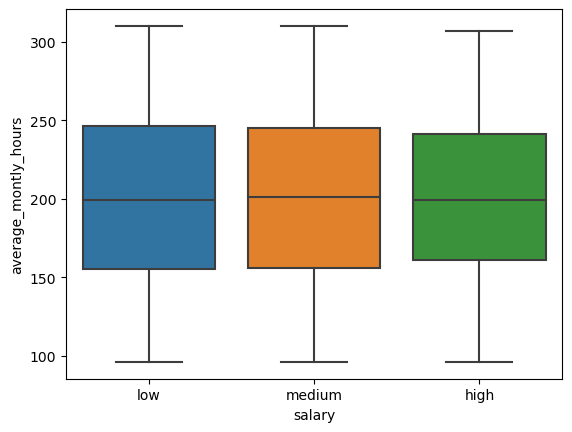

In [27]:
ax = sns.boxplot(x='salary', y='average_montly_hours', data=df)

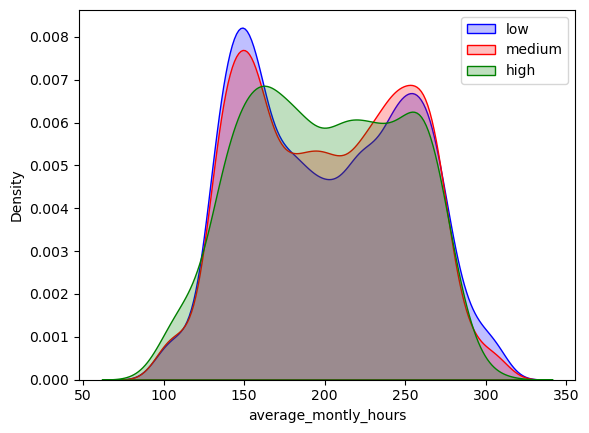

In [28]:
sns.kdeplot(df_sal_low['average_montly_hours'], label='low', fill=True, color = '#0000ff')
sns.kdeplot(df_sal_medium['average_montly_hours'], label='medium', fill=True, color = '#ff0000')
sns.kdeplot(df_sal_high['average_montly_hours'], label='high', fill=True, color = '#008000')
plt.legend()
plt.show()

Отвергаем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. Все работают одинаково.

# Задание 8

In [29]:
df.groupby('left')['promotion_last_5years'].value_counts()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: count, dtype: int64

In [30]:
round(300/11128, 4)*100

2.7

In [31]:
round(19/3552, 4)*100

0.53

Доля сотрудников получивших повышение среди тех кто не уволится 2,7%, а среди тех кто уволился 0,53%

In [32]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Средняя степень удовлетворенности среди тех кто не уволился выше

In [33]:
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Среднее количество проектов примерно одинаково

# Задание 9

In [35]:
df_dp = df.drop(['department', 'salary'], axis=1)
df_dp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [42]:
df_dp_class = df_dp.left
df_dp_class

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [43]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dp, df_dp_class, test_size=0.30, random_state=42)

In [44]:
len(y_test)

4500

In [45]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
lda = LinearDiscriminantAnalysis()

In [47]:
#обучение данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [49]:
#составляем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
#разница факта и прогноза
res = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [57]:
res

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
13388,0.0,NaN
10463,0.0,NaN
5331,0.0,NaN
7499,0.0,NaN


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778